In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# import pickle

In [4]:
df = pd.read_csv('C:/Users/lpdon/OneDrive/Área de Trabalho/lucas/library-lpd/python ds models/linear regression/dataset.csv', sep=';')

In [5]:
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [6]:
df.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


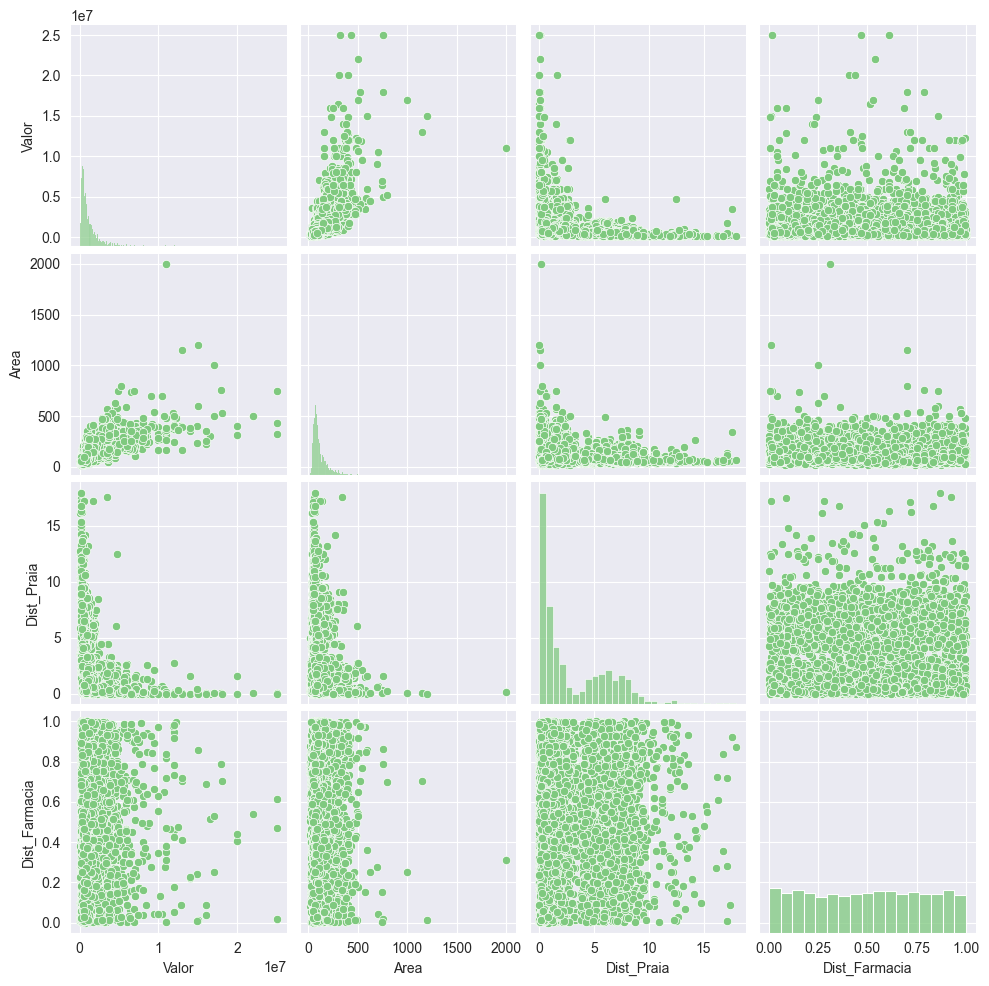

In [7]:
sns.pairplot(df)

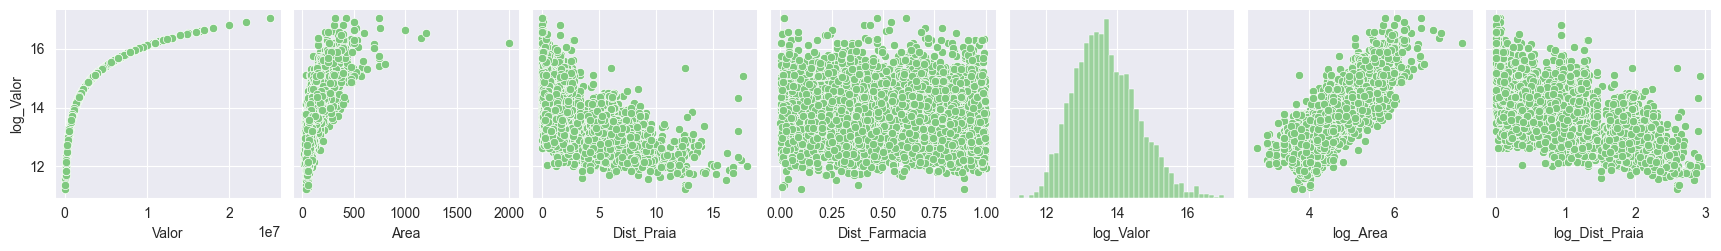

In [8]:
d = df.copy()
d['log_Valor'] = np.log(df['Valor']) # mt bom
d['log_Area'] = np.log(df['Area']) # mt bom
#d['1/(Dist_Praia+1)'] = 1/(df['Dist_Praia']+1) # ok
d['log_Dist_Praia'] = np.log(df['Dist_Praia']+1) # ok
#d['Dist_Paria**2'] = np.sqrt(df['Dist_Praia']) # ok
#d['fXp'] = d['log_Dist_Praia'] * df['Dist_Farmacia']


#d = d[['log_Valor','log_Area','1/(Dist_Praia+1)','Dist_Farmacia']]
sns.pairplot(d,y_vars=['log_Valor'])

In [9]:
class lm:
    def __init__(self,X,y):
        self.Xtr, self.Xte, self.ytr, self.yte = train_test_split(X, y, test_size=0.3)
        self.model = LinearRegression()
        self.model.fit(self.Xtr,self.ytr)
        self.y_predict = self.model.predict(self.Xte)

    def R2(self):
        print('train R² = {}'.format(self.model.score(self.Xtr, self.ytr).round(3)))
        print('test R² = {}'.format(metrics.r2_score(self.yte, self.y_predict).round(3)))
        return
    
    def other_metrics(self):
        EQM = metrics.mean_squared_error(self.yte, self.y_predict).round(3)
        REQM = np.sqrt(metrics.mean_squared_error(self.yte, self.y_predict)).round(3)
        R2 = metrics.r2_score(self.yte, self.y_predict).round(3)
        return pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])
        
    def summary(self):
        X_train_com_constante = sm.add_constant(self.Xtr)
        modelo_statsmodels = sm.OLS(self.ytr, X_train_com_constante, hasconst = True).fit()
        print(modelo_statsmodels.summary())

    def add_x(self,x,replace=False):
        pass

    def remove_x(self,name,replace=False):
        pass

    def compare(self,other):
        pass
        

In [17]:
lm(df[['Area','Dist_Praia','Dist_Farmacia']],df['Valor']).summary()

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     1441.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:15:25   Log-Likelihood:                -54089.
No. Observations:                3500   AIC:                         1.082e+05
Df Residuals:                    3496   BIC:                         1.082e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.007e+05   5.99e+04     -1.683